Часть 1. EDA

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [38]:
df = pd.read_csv ('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [39]:
df.shape

(1000, 10)

In [40]:
#Unnamed: 0  является ID клиента. Для нас данный столбец не является полезным.

In [41]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [43]:
df.Job.value_counts ()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [44]:
df.Housing.value_counts ()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [45]:
df.rename(columns = {'Saving accounts':'Saving_accounts'}, inplace = True )
df.rename(columns = {'Checking account':'Checking_account'}, inplace = True )
df.rename(columns = {'Credit amount':'Credit_amount'}, inplace = True )

In [46]:
df.Checking_account.value_counts ()

little      274
moderate    269
rich         63
Name: Checking_account, dtype: int64

In [47]:
df.Saving_accounts.value_counts ()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving_accounts, dtype: int64

In [48]:
df.Purpose.value_counts ()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [49]:
df[['Saving_accounts', 'Checking_account']] = df[['Saving_accounts', 'Checking_account']]. fillna ('no_data')

In [50]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,no_data,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,no_data,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [51]:
df_2=df.copy(deep=True)

In [52]:
Saving_accounts = {"Saving_accounts":     {"no_data": 0, "little": 1, "moderate": 2, "quite rich": 3, "rich": 4  }}
df= df.replace(Saving_accounts)
Checking_account = {"Checking_account":     {"no_data": 0, "little": 1, "moderate": 2, "rich": 4 }}
df= df.replace(Checking_account)

In [53]:
from sklearn.preprocessing import LabelEncoder # преобразуем все текстовые данные в численные
labelencoder =  LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Housing'] = labelencoder.fit_transform(df['Housing'])

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[['Purpose']])
ohe_result.toarray()
encoding_data=pd.DataFrame(ohe_result.toarray(), columns=ohe.categories_)
encoding_data.head()

,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df=encoding_data.join(df, how = 'right')

In [56]:
df = df.drop(["Purpose"], axis = 1)
df.head()

,"(business,)","(car,)","(domestic appliances,)","(education,)","(furniture/equipment,)","(radio/TV,)","(repairs,)","(vacation/others,)",Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67,1,2,1,0,1,1169,6
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,0,2,1,1,2,5951,48
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49,1,1,1,1,0,2096,12
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45,1,2,0,1,1,7882,42
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,2,0,1,1,4870,24


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df)
scaled_features= scaler.transform(df)
scaled_data= pd.DataFrame(scaled_features, columns = df.columns)
print(scaled_data)

     (business,)  (car,)  (domestic appliances,)  (education,)  \
0            0.0     0.0                     0.0           0.0   
1            0.0     0.0                     0.0           0.0   
2            0.0     0.0                     0.0           1.0   
3            0.0     0.0                     0.0           0.0   
4            0.0     1.0                     0.0           0.0   
..           ...     ...                     ...           ...   
995          0.0     0.0                     0.0           0.0   
996          0.0     1.0                     0.0           0.0   
997          0.0     0.0                     0.0           0.0   
998          0.0     0.0                     0.0           0.0   
999          0.0     1.0                     0.0           0.0   

     (furniture/equipment,)  (radio/TV,)  (repairs,)  (vacation/others,)  \
0                       0.0          1.0         0.0                 0.0   
1                       0.0          1.0         0.0   

In [58]:
scaled_data.head()

,"(business,)","(car,)","(domestic appliances,)","(education,)","(furniture/equipment,)","(radio/TV,)","(repairs,)","(vacation/others,)",Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.857143,1.0,0.666667,0.5,0.00,0.25,0.050567,0.029412
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053571,0.0,0.666667,0.5,0.25,0.50,0.313690,0.647059
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.535714,1.0,0.333333,0.5,0.25,0.00,0.101574,0.117647
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.464286,1.0,0.666667,0.0,0.25,0.25,0.419941,0.558824
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607143,1.0,0.666667,0.0,0.25,0.25,0.254209,0.294118


In [59]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (business,)             1000 non-null   float64
 1   (car,)                  1000 non-null   float64
 2   (domestic appliances,)  1000 non-null   float64
 3   (education,)            1000 non-null   float64
 4   (furniture/equipment,)  1000 non-null   float64
 5   (radio/TV,)             1000 non-null   float64
 6   (repairs,)              1000 non-null   float64
 7   (vacation/others,)      1000 non-null   float64
 8   Age                     1000 non-null   float64
 9   Sex                     1000 non-null   float64
 10  Job                     1000 non-null   float64
 11  Housing                 1000 non-null   float64
 12  Saving_accounts         1000 non-null   float64
 13  Checking_account        1000 non-null   float64
 14  Credit_amount           1000 non-null   f

Далее попробуем различные методики расчета количества кластеров для k_means и различные модели для уменьшения размерности

In [60]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(scaled_data)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\zhuko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


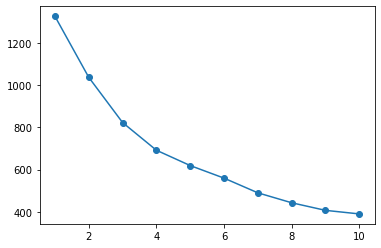

In [61]:
plt.plot(range(1,11), inertia, marker='o');

In [62]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

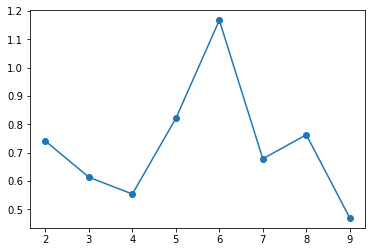

In [63]:
plt.plot(range(2,10), D, marker='o');

In [64]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(scaled_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [65]:
from sklearn.manifold import TSNE

In [66]:
tsne = TSNE(n_components=2, random_state=42)

In [67]:
X_tsne = tsne.fit_transform(scaled_data)

In [68]:
X_tsne.shape

(1000, 2)

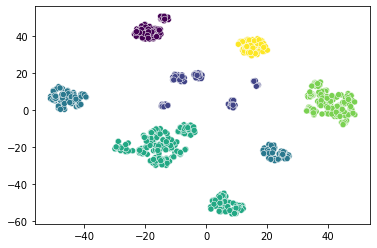

In [69]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], c=labels);

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.22878030168555097
For n_clusters = 3 The average silhouette_score is : 0.31749934530554513
For n_clusters = 4 The average silhouette_score is : 0.3713074012721766
For n_clusters = 5 The average silhouette_score is : 0.398652387472229
For n_clusters = 6 The average silhouette_score is : 0.36373382545954236
For n_clusters = 7 The average silhouette_score is : 0.36788860750142005
For n_clusters = 8 The average silhouette_score is : 0.37457122898463147
For n_clusters = 9 The average silhouette_score is : 0.3902112410835267
For n_clusters = 10 The average silhouette_score is : 0.3372948170839309


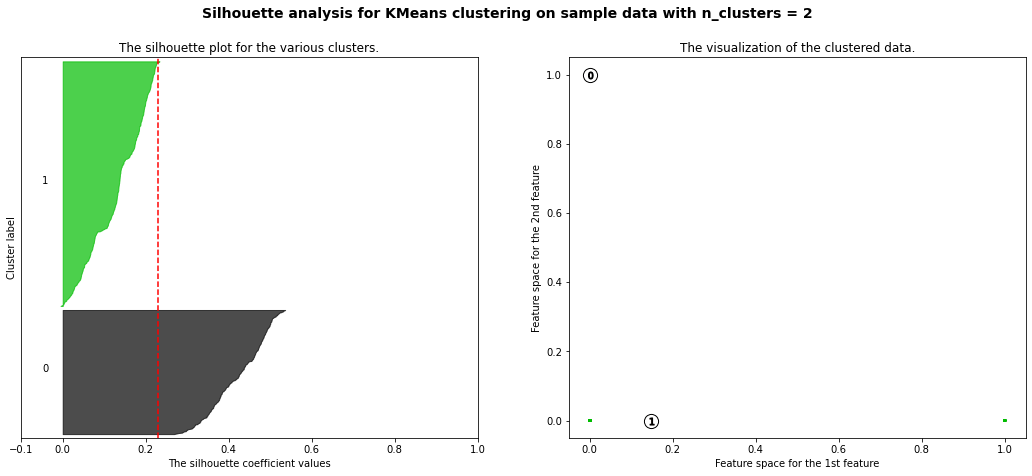

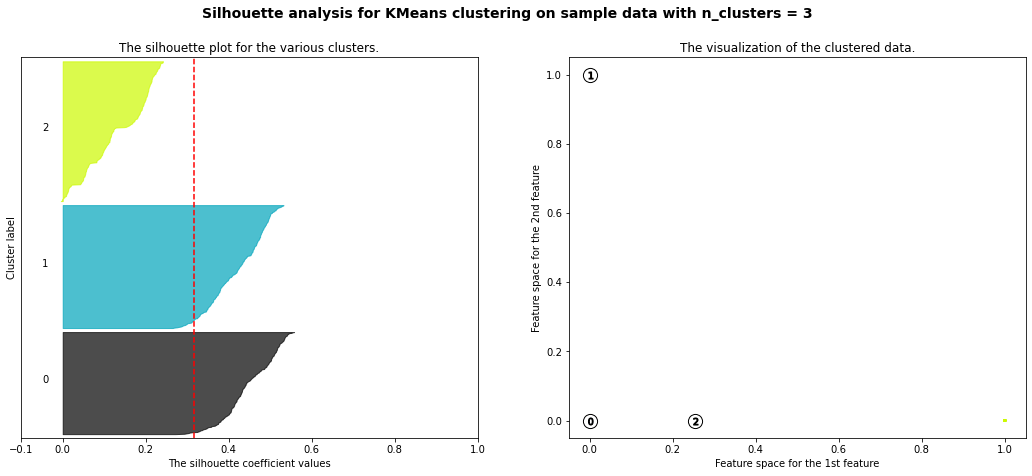

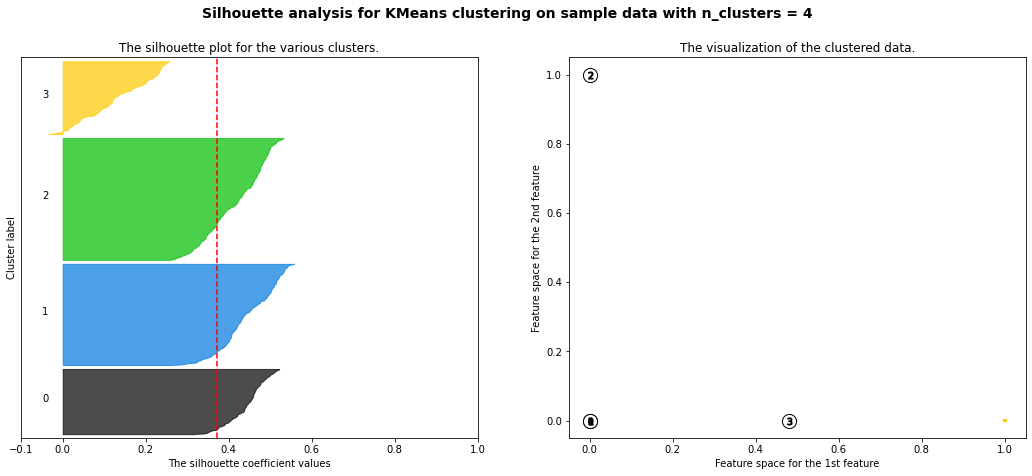

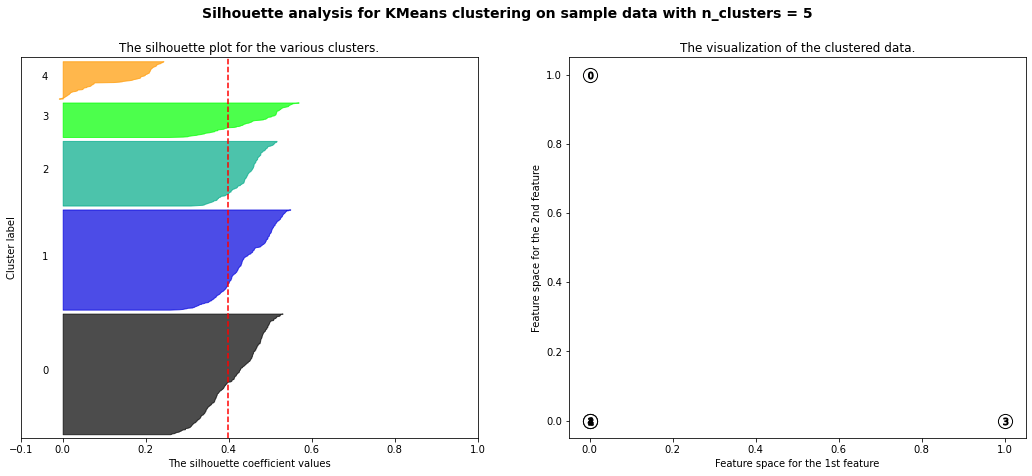

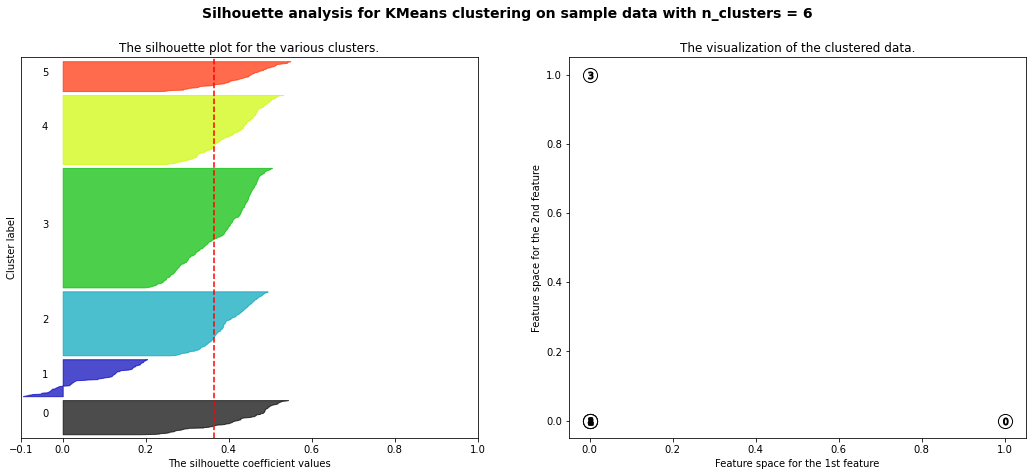

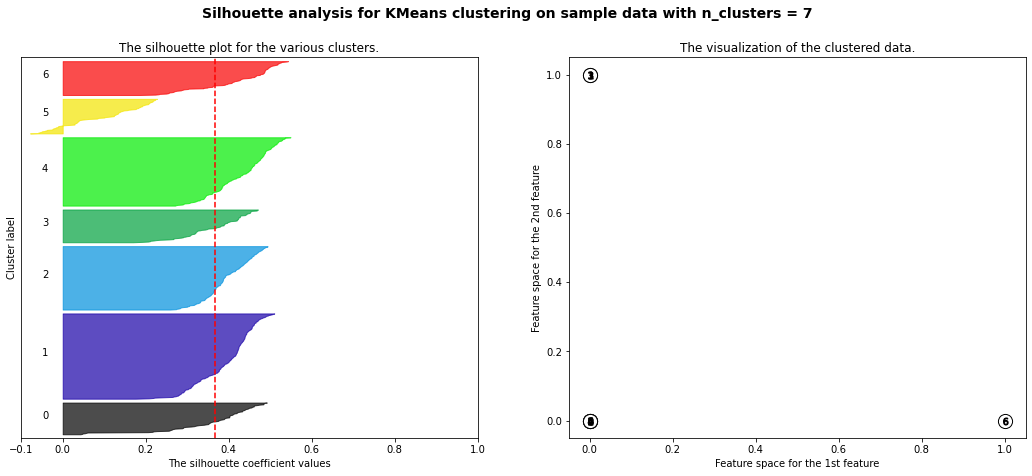

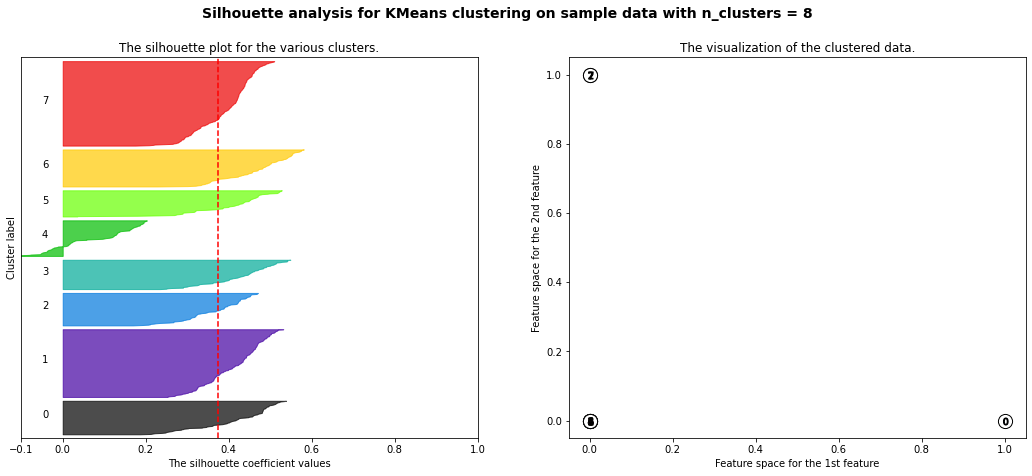

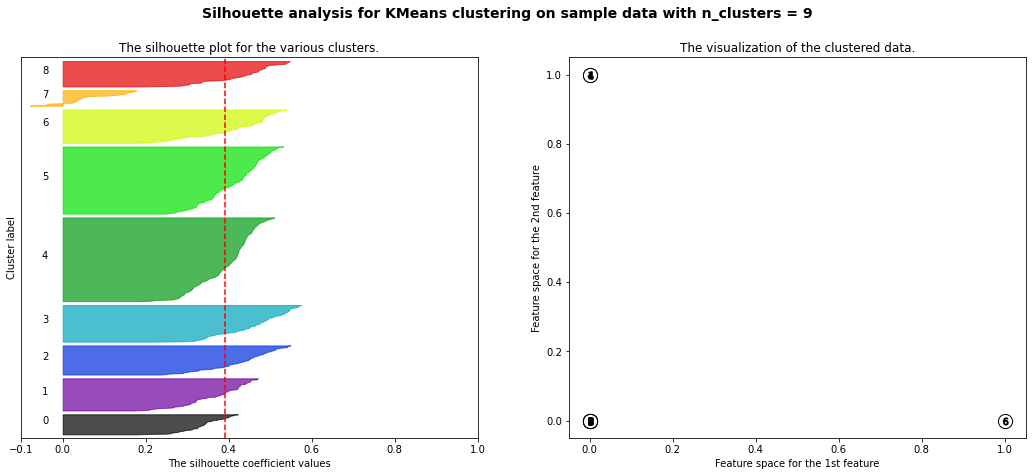

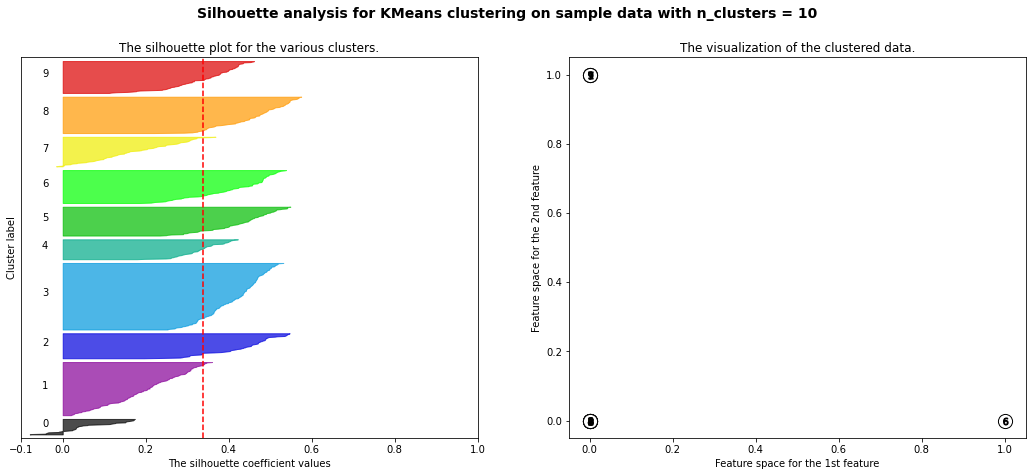

In [72]:
import matplotlib.cm as cm
for n_clusters in range_n_clusters:
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта  в этом примере 
    # лежит в пределах [-0,1, 1]
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    # семя из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложите оценки силуэтов для образцов, принадлежащих
        # кластер i, и отсортируйте их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначьте графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [73]:
kmeans_2 = KMeans(n_clusters=5, random_state=42).fit(scaled_data)
labels_2 = kmeans_2.labels_
centers = kmeans.cluster_centers_

In [74]:
tsne_2 = TSNE(n_components=2, random_state=42)

In [75]:
X_tsne_2 = tsne_2.fit_transform(scaled_data)

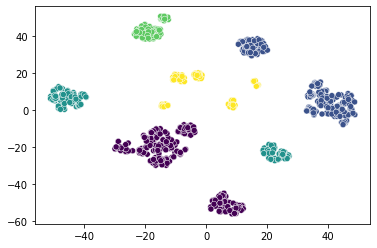

In [76]:
sns.scatterplot(x=X_tsne_2[:,0], y=X_tsne_2[:,1], c=labels_2);

In [77]:
#Попробуем РСА для уменьшения размерности

In [78]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [79]:
pca.explained_variance_ratio_

array([2.35444445e-01, 1.79488219e-01, 1.50418502e-01, 8.88422541e-02,
       5.97728301e-02, 5.78619254e-02, 5.00133913e-02, 4.44875897e-02,
       3.77733620e-02, 2.63262959e-02, 2.31729775e-02, 1.95824264e-02,
       1.09960591e-02, 9.09744120e-03, 6.72228171e-03, 1.76208030e-32])

In [80]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23544444, 0.41493266, 0.56535117, 0.65419342, 0.71396625,
       0.77182818, 0.82184157, 0.86632916, 0.90410252, 0.93042881,
       0.95360179, 0.97318422, 0.98418028, 0.99327772, 1.        ,
       1.        ])

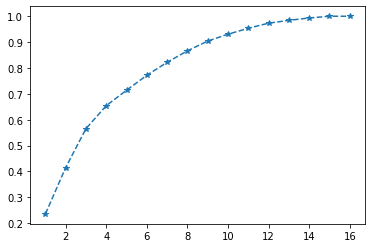

In [81]:
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_), '*--');

In [82]:
x_pca = PCA(n_components=12).fit_transform(scaled_data)
x_pca.shape

(1000, 12)

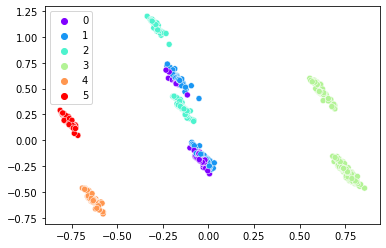

In [83]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels, palette='rainbow');

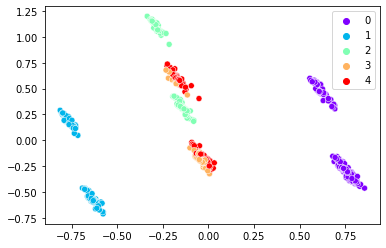

In [84]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels_2, palette='rainbow');

In [85]:
#Попробуем umap  

In [86]:
import umap

In [87]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(scaled_data)

In [88]:
embedding.shape

(1000, 2)

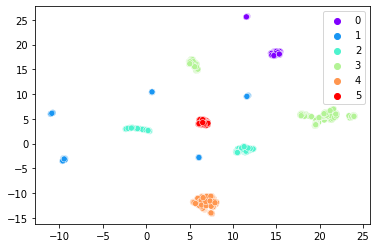

In [89]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels, palette='rainbow');

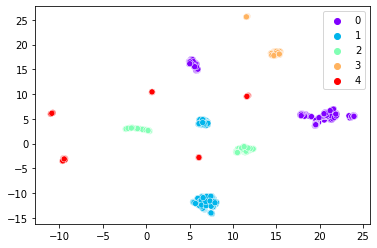

In [90]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels_2, palette='rainbow');

На мой взгляд для K_Means в целях сжатия признакового пространства наиболее подходит tsne с дефолтными гиперпараметрами.

Далее попробуем иерархическую агломерационную кластеризацию (AgglomerativeClustering).

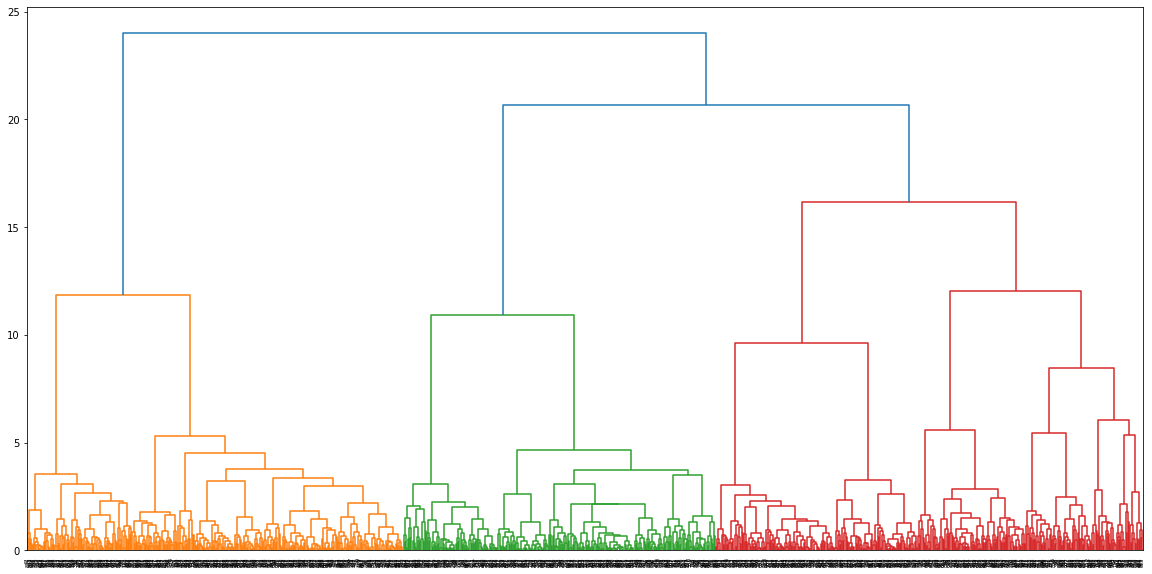

In [91]:
plt.figure(figsize=(20,10))
linkage_ = linkage(scaled_data, method='ward')
dendrogram_ = dendrogram(linkage_)

In [101]:
from tqdm import tqdm
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(scaled_data)
    labels = agg.labels_
    score = silhouette_score(scaled_data, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 27.52it/s]


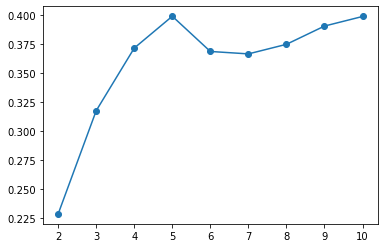

In [102]:
plt.plot(range(2,11), silhouette, marker='o');

In [103]:
agg = AgglomerativeClustering(n_clusters=5).fit(scaled_data)
labels_3 = agg.labels_

In [104]:
#tsne

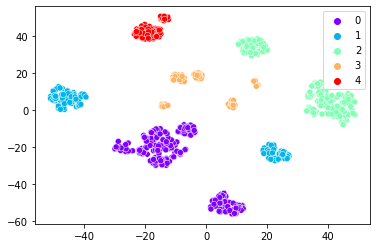

In [105]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_3, palette='rainbow');

In [106]:
#PCA

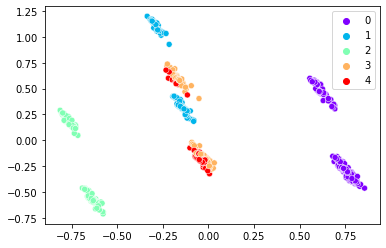

In [107]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels_3, palette='rainbow');

In [108]:
#UMAP

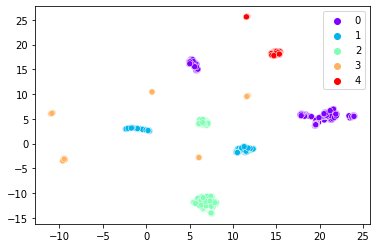

In [109]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels_3, palette='rainbow');

На мой взгляд для AgglomerativeClustering в целях сжатия признакового пространства так подходит tsne с дефолтными 
гиперпараметрами. Причем визуально разделение кажется лучше по сравнению с K_means.

Попробуем dbscan

In [110]:
dbscan = DBSCAN().fit(scaled_data)
labels_4 = dbscan.labels_

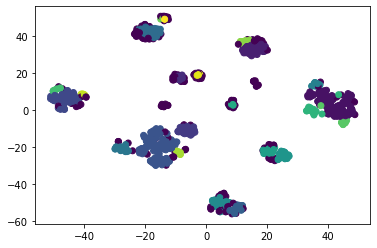

In [111]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_4);

In [112]:
#По дефолту "не очень".

In [113]:
uniq_labels = np.unique(labels)
uniq_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [114]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

10

In [115]:
def dbscan_clustering(eps_range, scaled_data):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(scaled_data)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(scaled_data, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 19/19 [00:00<00:00, 35.39it/s]


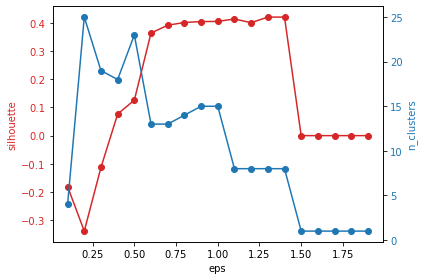

In [116]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, scaled_data)

100%|██████████| 15/15 [00:00<00:00, 37.40it/s]


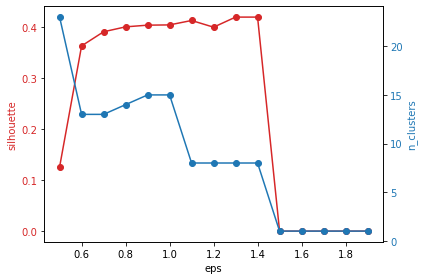

In [117]:
eps_range = np.arange(0.5,2,0.1)
dbscan_clustering(eps_range, scaled_data)

100%|██████████| 5/5 [00:00<00:00, 31.23it/s]


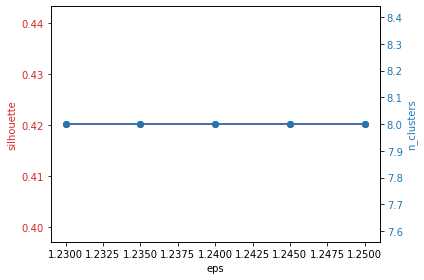

In [118]:
eps_range = np.arange(1.23,1.25,0.005)
dbscan_clustering(eps_range, scaled_data)

кластеров: 8


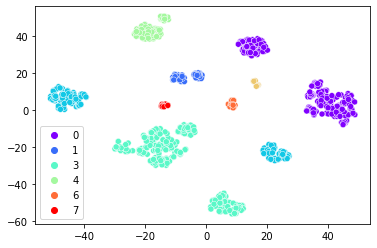

In [119]:
dbscan = DBSCAN(eps=1.24, min_samples=5).fit(scaled_data)
labels_5 = dbscan.labels_
uniq_labels_2 = np.unique(labels_5)
n_clusters = len(uniq_labels_2[uniq_labels_2 != -1])
print(f'кластеров: {n_clusters}')
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_5, palette='rainbow');

In [120]:
#PCA

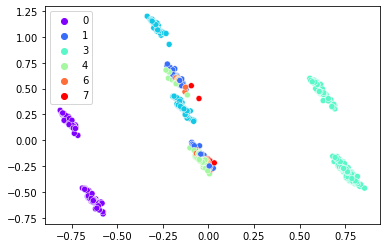

In [121]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels_5, palette='rainbow');

In [122]:
#UMAP

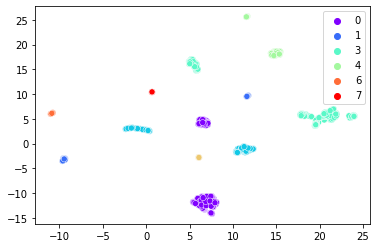

In [123]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels_5, palette='rainbow');

"Немного получше". В целом для рассматриваемого датасета K_Means и AgglomerativeClustering c TSNE показывают аналогичные результаты, которые на мой взгляд лучше остальных. Поэтому возьму связку AgglomerativeClustering с tsne.

In [125]:
df_2['labels'] = labels_3
df_2.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,labels
0,67,male,2,own,no_data,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,no_data,2096,12,education,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [126]:
df_2['labels'].value_counts(normalize=True).sort_index()

0    0.337
1    0.181
2    0.280
3    0.105
4    0.097
Name: labels, dtype: float64

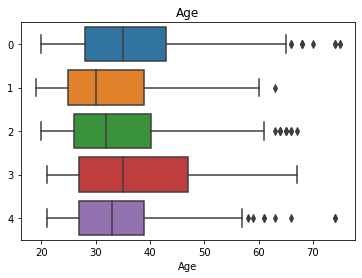

In [127]:
sns.boxplot(data=df_2, x='Age', y=labels_3, orient='h')
plt.title('Age')
plt.show();

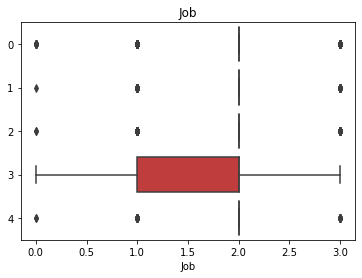

In [128]:
sns.boxplot(data=df_2, x='Job', y=labels_3, orient='h')
plt.title('Job')
plt.show();

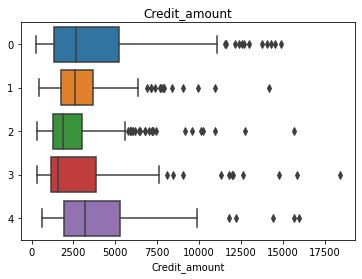

In [129]:
sns.boxplot(data=df_2, x='Credit_amount', y=labels_3, orient='h')
plt.title('Credit_amount')
plt.show();

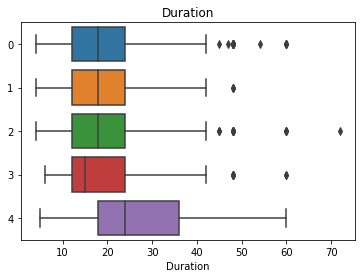

In [130]:
sns.boxplot(data=df_2, x='Duration', y=labels_3, orient='h')
plt.title('Duration')
plt.show();

<AxesSubplot:xlabel='Sex', ylabel='count'>

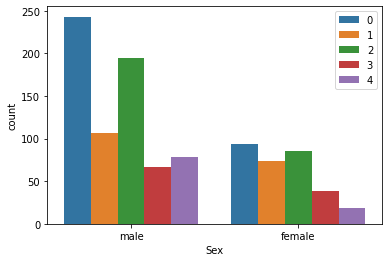

In [131]:
sns.countplot(x='Sex', hue=labels_3, data=df_2)

<AxesSubplot:xlabel='Housing', ylabel='count'>

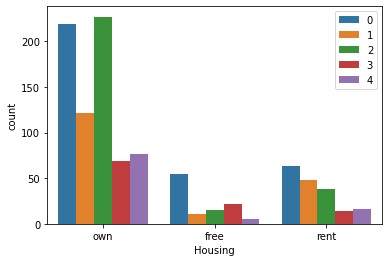

In [132]:
sns.countplot(x='Housing', hue=labels_3, data=df_2)

In [ ]:
Saving_accounts	Checking_account			Purpose

<AxesSubplot:xlabel='Checking_account', ylabel='count'>

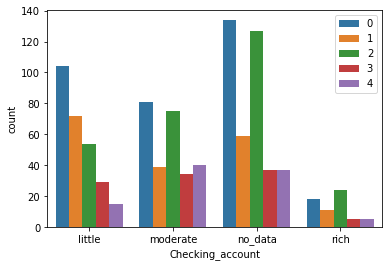

In [133]:
sns.countplot(x='Checking_account', hue=labels_3, data=df_2)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

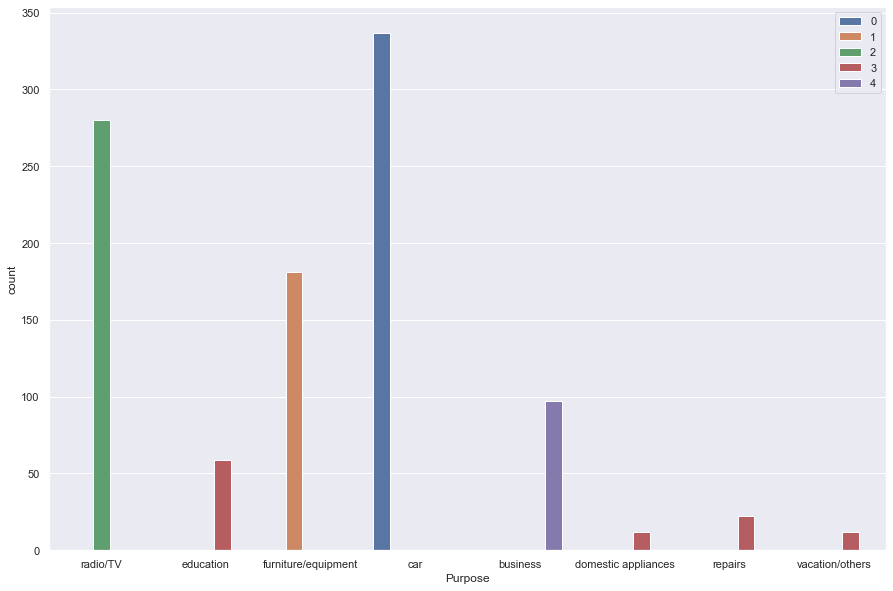

In [147]:
from matplotlib import rcParams
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='Purpose', hue=labels_3, data=df_2)

Выводы: Анализируя boxplot'ы можно сказать, что в целом мужчины берут кредит чаще. Возраст заемщиков в большинстве случаев  до 40 лет, только в нулевой и третьей группе он более 40 лет. Абсолютное большинство клиентов имеют работу типа 1 и 2, относятся к 3й группе. В группах 1,2,3 суммы кредита в основном до 3,5тыс (оборудование, радио/тв, образование). Причем из этих категорий, больше всего берут на радио/тв. Сумма кредита на автомобиль и бизнес в среднем выше - до 5,5 тыс (группа 0 и 4), причем в основном берется кредит на автомобиль (в 3,5 раза чаще). Продолжительность кредита во всех группах, кроме 4й (бизнес) примерно одинакова - 23 месяца. Продолжительность кредита на бизнес выше, в среднем до 36 месяцев.